Ho Va Ten: Nguyen Quang Truong

MSSV: 21110429

# Pattern Recognition Lab 01

## Library

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.datasets as dset
from torch.utils.data import sampler


## Data Loader

In [ ]:
# Hyperparameters
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 20

#Data Augmentation for data test and validation
transform_test = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#Data augmentation for data train
transform_train = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(), #Flip the image horizontally randomly
        transforms.RandomRotation(10), #Randomly rotate the image up to 10 degrees
        transforms.ColorJitter(), #Adjust brightness, contrast and color
        # transforms.GaussianBlur((3,3)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ])

# number image for train
NUM_TRAIN = 49000

# Data for train
cifar10_train = dset.CIFAR10('./datasets', train=True, download=True,
                             transform=transform_train)
loader_train = DataLoader(cifar10_train, batch_size=batch_size,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)), num_workers=2)

# Data for Validation
cifar10_val = dset.CIFAR10('./datasets', train=True, download=True,
                           transform=transform_test)
loader_val = DataLoader(cifar10_val, batch_size=batch_size,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 50000)),num_workers=2)

# Data for test
cifar10_test = dset.CIFAR10('./datasets', train=False, download=True,
                            transform=transform_test)
loader_test = DataLoader(cifar10_test, batch_size=batch_size,shuffle=False, num_workers=2)


#class
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:04<00:00, 38009136.98it/s]


Extracting ./datasets/cifar-10-python.tar.gz to ./datasets
Files already downloaded and verified
Files already downloaded and verified


## Visualizing Examples from the CIFAR10 Dataset

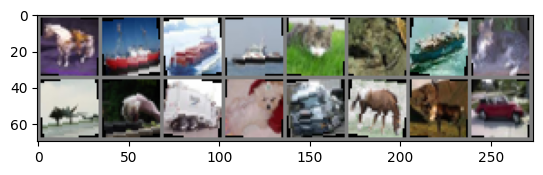

horse -- ship -- ship -- ship -- cat -- frog -- ship -- cat
plane -- bird -- truck -- dog -- truck -- horse -- deer -- car


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to unnormalize and display an image
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training data
dataiter = iter(loader_train)
images, labels = next(dataiter)

# Display the images in a grid along with their labels
imshow(torchvision.utils.make_grid(images[:16]))
print(" -- ".join(f"{classes[labels[j]]}" for j in range(8)))
print(" -- ".join(f"{classes[labels[j]]}" for j in range(8,16)))

## Model Architecture

In [ ]:
class CNN(nn.Module):
  def __init__(self, input_channels=3, numclass=10):
    super(CNN,self).__init__()

    self.conv1= nn.Conv2d(in_channels=input_channels, out_channels=16, kernel_size=3,stride=1)
    self.conv2= nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3,stride=1)
    self.batchNorm1= nn.BatchNorm2d(32)
    self.Relu1=  nn.ReLU()
    self.maxPool1= nn.MaxPool2d(kernel_size = 2, stride = 1)


    self.conv3= nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3,stride=1)
    self.batchNorm2= nn.BatchNorm2d(64)
    self.Relu2= nn.ReLU()
    self.maxPool2= nn.MaxPool2d(kernel_size = 2, stride = 2)

    self.conv4= nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,stride=1)
    self.batchNorm3= nn.BatchNorm2d(128)
    self.Relu3= nn.ReLU()
    self.maxPool3= nn.MaxPool2d(kernel_size = 2, stride = 2)



    self.fc1 = nn.Linear(3200  , 512)
    ## self.dropout1 = nn.Dropout(p=0.5)
    self.Relu4= nn.ReLU()
    self.fc2= nn.Linear(512,numclass)


  def forward(self,x):
    out=self.conv1(x)
    out=self.conv2(out)
    out= self.batchNorm1(out)
    out= self.Relu1(out)
    out = self.maxPool1(out)


    out= self.conv3(out)
    out=self.batchNorm2(out)
    out= self.Relu2(out)
    out = self.maxPool2(out)

    out=self.conv4(out)
    out= self.batchNorm3(out)
    out= self.Relu3(out)
    out = self.maxPool3(out)


    out = out.reshape(out.size(0), -1)

    out = self.fc1(out)
    # out= self.dropout1(out)
    out= self.Relu4(out)
    out= self.fc2(out)


    return out




## Train


In [ ]:

#Hyperparameter
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 20

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#model
model=CNN(input_channels=3, numclass=10)

# Set Loss function
loss_fn = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

total_step = len(loader_train)

In [ ]:
#Moves the model and its parameters to the specified device
model.to(device)

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (batchNorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (Relu1): ReLU()
  (maxPool1): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (batchNorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (Relu2): ReLU()
  (maxPool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (batchNorm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (Relu3): ReLU()
  (maxPool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3200, out_features=512, bias=True)
  (Relu4): ReLU()
  (fc2): Linear(in_features=512, out_features=10, bias=True)

In [ ]:
from tqdm import tqdm

# Save history of accuracy and loss
history_train_accuracy=list()
history_val_accuracy= list()
history_train_loss=list()
history_val_loss= list()

for epoch in range(num_epochs):

    overall_loss = 0.0; correct = 0; total = 0
    model.train()# Active training mode of model

    for images, labels in (pbar:=tqdm( loader_train, desc=f'Epoch [{epoch+1}/{num_epochs}]')):
        # Transfer data to device (GPU/CPU)
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        overall_loss += loss.item()

        # Compute accuracy
        preds = torch.argmax(outputs.data, dim=1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

        # Progress bar logging
        pbar.set_postfix(loss=loss.item(), accuracy=correct/total)

        # Backward and optimize
        optimizer.zero_grad()   # Clear gradient cache of the previous step iteration
        loss.backward()
        optimizer.step()
    history_train_accuracy.append(correct/total)
    history_train_loss.append(overall_loss/total_step)
    print("\n")
    print('\tSummary epoch {}: Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch+1,
                                                                      overall_loss/total_step,
                                                                      correct/total))

    # Validation
    model.eval()
    with torch.no_grad():
      correct_val = 0
      total_val = 0
      overall_loss_val=0

      for inputs, labels in loader_val:
          inputs = inputs.to(device)
          labels = labels.to(device)
          outputs = model(inputs)

          loss_val = loss_fn(outputs, labels)
          overall_loss_val += loss_val.item()

          _, predicted = outputs.max(1)
          correct_val += predicted.eq(labels).sum().item()
          total_val += labels.size(0)

      val_accuracy = correct_val / total_val
      val_loss= overall_loss_val/ len(loader_val)
      history_val_accuracy.append(val_accuracy)
      history_val_loss.append(val_loss)
      print(f'\t Validation Accuracy: {val_accuracy:.4f}, \t Validation Loss: {val_loss: .4f}')
      print("\n")



Epoch [1/20]: 100%|██████████| 766/766 [00:33<00:00, 22.70it/s, accuracy=0.528, loss=1.23]



	Summary epoch 1: Loss: 1.3109, Accuracy: 0.5280


	 Validation Accuracy: 0.6550, 	 Validation Loss:  0.9683




Epoch [2/20]: 100%|██████████| 766/766 [00:33<00:00, 23.04it/s, accuracy=0.671, loss=0.907]



	Summary epoch 2: Loss: 0.9287, Accuracy: 0.6715


	 Validation Accuracy: 0.6930, 	 Validation Loss:  0.9011




Epoch [3/20]: 100%|██████████| 766/766 [00:35<00:00, 21.50it/s, accuracy=0.72, loss=0.702]



	Summary epoch 3: Loss: 0.7974, Accuracy: 0.7198


	 Validation Accuracy: 0.7450, 	 Validation Loss:  0.7244




Epoch [4/20]: 100%|██████████| 766/766 [00:32<00:00, 23.46it/s, accuracy=0.749, loss=0.629]



	Summary epoch 4: Loss: 0.7155, Accuracy: 0.7485


	 Validation Accuracy: 0.7600, 	 Validation Loss:  0.7091




Epoch [5/20]: 100%|██████████| 766/766 [00:32<00:00, 23.37it/s, accuracy=0.772, loss=0.58]



	Summary epoch 5: Loss: 0.6550, Accuracy: 0.7718


	 Validation Accuracy: 0.7810, 	 Validation Loss:  0.6266




Epoch [6/20]: 100%|██████████| 766/766 [00:32<00:00, 23.33it/s, accuracy=0.787, loss=0.66]



	Summary epoch 6: Loss: 0.6054, Accuracy: 0.7869


	 Validation Accuracy: 0.7800, 	 Validation Loss:  0.6044




Epoch [7/20]: 100%|██████████| 766/766 [00:34<00:00, 22.39it/s, accuracy=0.8, loss=0.64]



	Summary epoch 7: Loss: 0.5646, Accuracy: 0.8000


	 Validation Accuracy: 0.8020, 	 Validation Loss:  0.5679




Epoch [8/20]: 100%|██████████| 766/766 [00:33<00:00, 23.06it/s, accuracy=0.815, loss=0.343]



	Summary epoch 8: Loss: 0.5286, Accuracy: 0.8151


	 Validation Accuracy: 0.8230, 	 Validation Loss:  0.5432




Epoch [9/20]: 100%|██████████| 766/766 [00:32<00:00, 23.46it/s, accuracy=0.824, loss=0.287]



	Summary epoch 9: Loss: 0.4990, Accuracy: 0.8244


	 Validation Accuracy: 0.8080, 	 Validation Loss:  0.5443




Epoch [10/20]: 100%|██████████| 766/766 [00:32<00:00, 23.22it/s, accuracy=0.837, loss=0.436]



	Summary epoch 10: Loss: 0.4666, Accuracy: 0.8372


	 Validation Accuracy: 0.8190, 	 Validation Loss:  0.5491




Epoch [11/20]: 100%|██████████| 766/766 [00:34<00:00, 22.40it/s, accuracy=0.842, loss=0.461]



	Summary epoch 11: Loss: 0.4452, Accuracy: 0.8421


	 Validation Accuracy: 0.8110, 	 Validation Loss:  0.5283




Epoch [12/20]: 100%|██████████| 766/766 [00:32<00:00, 23.50it/s, accuracy=0.851, loss=0.26]



	Summary epoch 12: Loss: 0.4213, Accuracy: 0.8513


	 Validation Accuracy: 0.8260, 	 Validation Loss:  0.5161




Epoch [13/20]: 100%|██████████| 766/766 [00:33<00:00, 23.20it/s, accuracy=0.862, loss=0.647]



	Summary epoch 13: Loss: 0.3949, Accuracy: 0.8618


	 Validation Accuracy: 0.8280, 	 Validation Loss:  0.5052




Epoch [14/20]: 100%|██████████| 766/766 [00:33<00:00, 23.20it/s, accuracy=0.866, loss=0.559]



	Summary epoch 14: Loss: 0.3813, Accuracy: 0.8663


	 Validation Accuracy: 0.8280, 	 Validation Loss:  0.5327




Epoch [15/20]: 100%|██████████| 766/766 [00:34<00:00, 21.97it/s, accuracy=0.873, loss=0.22]



	Summary epoch 15: Loss: 0.3618, Accuracy: 0.8725


	 Validation Accuracy: 0.8260, 	 Validation Loss:  0.5410




Epoch [16/20]: 100%|██████████| 766/766 [00:33<00:00, 23.14it/s, accuracy=0.88, loss=0.425]



	Summary epoch 16: Loss: 0.3458, Accuracy: 0.8798


	 Validation Accuracy: 0.8330, 	 Validation Loss:  0.5224




Epoch [17/20]: 100%|██████████| 766/766 [00:33<00:00, 22.53it/s, accuracy=0.885, loss=0.591]



	Summary epoch 17: Loss: 0.3276, Accuracy: 0.8855


	 Validation Accuracy: 0.8430, 	 Validation Loss:  0.5026




Epoch [18/20]: 100%|██████████| 766/766 [00:33<00:00, 22.90it/s, accuracy=0.888, loss=0.26]



	Summary epoch 18: Loss: 0.3140, Accuracy: 0.8885


	 Validation Accuracy: 0.8390, 	 Validation Loss:  0.5016




Epoch [19/20]: 100%|██████████| 766/766 [00:34<00:00, 22.37it/s, accuracy=0.895, loss=0.251]



	Summary epoch 19: Loss: 0.2996, Accuracy: 0.8950


	 Validation Accuracy: 0.8350, 	 Validation Loss:  0.5065




Epoch [20/20]: 100%|██████████| 766/766 [00:33<00:00, 22.87it/s, accuracy=0.897, loss=0.0941]



	Summary epoch 20: Loss: 0.2886, Accuracy: 0.8973


	 Validation Accuracy: 0.8500, 	 Validation Loss:  0.4728




In [ ]:
#Evaluate the model through the Loader Test
model.eval()
with torch.no_grad():
    correct_val = 0
    total_val = 0

    for inputs, labels in loader_test:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)

        _, predicted = outputs.max(1)

        correct_val += predicted.eq(labels).sum().item()
        total_val += labels.size(0)

    val_accuracy = correct_val / total_val
    print("__"*5,"ACCURACY TEST","__"*5)
    print(f'\t Test Accuracy: {val_accuracy:.4f}')
    print("__"*18)

__________ ACCURACY TEST __________
	 Test Accuracy: 0.8292
____________________________________


## Hyperparameter Tuning


In [ ]:
learning_rates = [ 1e-4, 0.001]
batch_sizes = [32, 64, 100]
num_epochs = 10

for lr in learning_rates:
  for batch_size in batch_sizes:
    print("__"*50)
    print(f"Learning Rate: {lr}, Batch Size: {batch_size}")
    # number image for train
    NUM_TRAIN = 49000

    # Data for train
    cifar10_train = dset.CIFAR10('./datasets', train=True, download=True,
                                transform=transform_train)
    loader_train = DataLoader(cifar10_train, batch_size=batch_size,
                              sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)), num_workers=2)

    # Data for Validation
    cifar10_val = dset.CIFAR10('./datasets', train=True, download=True,
                              transform=transform_test)
    loader_val = DataLoader(cifar10_val, batch_size=batch_size,
                            sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 50000)),num_workers=2)

    # Instantiate the model, loss function, and optimizer
    model_Tune= CNN(input_channels=3, numclass=10)
    model_Tune.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_Tune.parameters(), lr=lr)

    # Training loop
    # Reduce the number of epochs for faster hyperparameter tuning

    for epoch in range(num_epochs):
      overall_loss = 0.0; correct = 0; total = 0
      model_Tune.train()
      # Active training mode of model

      for images, labels in (pbar:=tqdm( loader_train, desc=f'Epoch [{epoch+1}/{num_epochs}]')):
          # Transfer data to device (GPU/CPU)
          images = images.to(device)
          labels = labels.to(device)

          # Forward pass
          outputs = model_Tune(images)
          loss = loss_fn(outputs, labels)
          overall_loss += loss.item()

          # Compute accuracy
          preds = torch.argmax(outputs.data, dim=1)
          total += labels.size(0)
          correct += (preds == labels).sum().item()

          # Progress bar logging
          pbar.set_postfix(loss=loss.item(), accuracy=correct/total)

          # Backward and optimize
          optimizer.zero_grad()   # Clear gradient cache of the previous step iteration
          loss.backward()

          optimizer.step()


      print('\tSummary epoch {}: Loss: {:.4f}, Accuracy: {:.4f}\n'.format(epoch+1,
                                                                        overall_loss/total_step,
                                                                        correct/total))
      print("\n")

      # Validation
    model_Tune.eval()
    with torch.no_grad():
      correct_val = 0
      total_val = 0

      for inputs, labels in loader_val:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model_Tune(inputs)
        _, predicted = outputs.max(1)
        correct_val += predicted.eq(labels).sum().item()
        total_val += labels.size(0)

      val_accuracy = correct_val / total_val
      print(f'Validation Accuracy: {val_accuracy:.4f}')
      print("\n")

____________________________________________________________________________________________________
Learning Rate: 0.0001, Batch Size: 32
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/10]: 100%|██████████| 1532/1532 [00:40<00:00, 38.20it/s, accuracy=0.544, loss=0.397]


	Summary epoch 1: Loss: 2.5667, Accuracy: 0.5437





Epoch [2/10]: 100%|██████████| 1532/1532 [00:42<00:00, 36.23it/s, accuracy=0.65, loss=0.771]


	Summary epoch 2: Loss: 1.9959, Accuracy: 0.6502





Epoch [3/10]: 100%|██████████| 1532/1532 [00:42<00:00, 36.28it/s, accuracy=0.691, loss=0.491]


	Summary epoch 3: Loss: 1.7585, Accuracy: 0.6913





Epoch [4/10]: 100%|██████████| 1532/1532 [00:39<00:00, 38.31it/s, accuracy=0.724, loss=0.803]


	Summary epoch 4: Loss: 1.5792, Accuracy: 0.7241





Epoch [5/10]: 100%|██████████| 1532/1532 [00:42<00:00, 36.04it/s, accuracy=0.745, loss=0.667]


	Summary epoch 5: Loss: 1.4555, Accuracy: 0.7455





Epoch [6/10]: 100%|██████████| 1532/1532 [00:42<00:00, 35.96it/s, accuracy=0.764, loss=0.644]


	Summary epoch 6: Loss: 1.3503, Accuracy: 0.7644





Epoch [7/10]: 100%|██████████| 1532/1532 [00:40<00:00, 37.58it/s, accuracy=0.778, loss=0.428]


	Summary epoch 7: Loss: 1.2716, Accuracy: 0.7785





Epoch [8/10]: 100%|██████████| 1532/1532 [00:42<00:00, 36.40it/s, accuracy=0.792, loss=0.632]


	Summary epoch 8: Loss: 1.1946, Accuracy: 0.7920





Epoch [9/10]: 100%|██████████| 1532/1532 [00:42<00:00, 36.48it/s, accuracy=0.804, loss=0.872]


	Summary epoch 9: Loss: 1.1281, Accuracy: 0.8044





Epoch [10/10]: 100%|██████████| 1532/1532 [00:40<00:00, 38.19it/s, accuracy=0.813, loss=1.3]

	Summary epoch 10: Loss: 1.0705, Accuracy: 0.8130





Validation Accuracy: 0.8090


____________________________________________________________________________________________________
Learning Rate: 0.0001, Batch Size: 64
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/10]: 100%|██████████| 766/766 [00:34<00:00, 22.29it/s, accuracy=0.523, loss=1.07]


	Summary epoch 1: Loss: 1.3276, Accuracy: 0.5225





Epoch [2/10]: 100%|██████████| 766/766 [00:34<00:00, 22.42it/s, accuracy=0.631, loss=0.998]


	Summary epoch 2: Loss: 1.0477, Accuracy: 0.6314





Epoch [3/10]: 100%|██████████| 766/766 [00:34<00:00, 22.20it/s, accuracy=0.675, loss=1.02]


	Summary epoch 3: Loss: 0.9356, Accuracy: 0.6749





Epoch [4/10]: 100%|██████████| 766/766 [00:36<00:00, 21.15it/s, accuracy=0.703, loss=0.961]


	Summary epoch 4: Loss: 0.8537, Accuracy: 0.7032





Epoch [5/10]: 100%|██████████| 766/766 [00:36<00:00, 21.22it/s, accuracy=0.728, loss=0.739]


	Summary epoch 5: Loss: 0.7859, Accuracy: 0.7277





Epoch [6/10]: 100%|██████████| 766/766 [00:33<00:00, 22.63it/s, accuracy=0.744, loss=0.631]


	Summary epoch 6: Loss: 0.7395, Accuracy: 0.7436





Epoch [7/10]: 100%|██████████| 766/766 [00:35<00:00, 21.39it/s, accuracy=0.758, loss=0.628]


	Summary epoch 7: Loss: 0.6934, Accuracy: 0.7585





Epoch [8/10]: 100%|██████████| 766/766 [00:34<00:00, 21.97it/s, accuracy=0.771, loss=0.629]


	Summary epoch 8: Loss: 0.6590, Accuracy: 0.7713





Epoch [9/10]: 100%|██████████| 766/766 [00:33<00:00, 23.11it/s, accuracy=0.785, loss=0.906]


	Summary epoch 9: Loss: 0.6209, Accuracy: 0.7853





Epoch [10/10]: 100%|██████████| 766/766 [00:33<00:00, 22.81it/s, accuracy=0.795, loss=0.452]

	Summary epoch 10: Loss: 0.5953, Accuracy: 0.7946





Validation Accuracy: 0.7810


____________________________________________________________________________________________________
Learning Rate: 0.0001, Batch Size: 100
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/10]: 100%|██████████| 490/490 [00:32<00:00, 15.05it/s, accuracy=0.527, loss=1.32]


	Summary epoch 1: Loss: 0.8488, Accuracy: 0.5272





Epoch [2/10]: 100%|██████████| 490/490 [00:31<00:00, 15.46it/s, accuracy=0.631, loss=0.956]


	Summary epoch 2: Loss: 0.6721, Accuracy: 0.6309





Epoch [3/10]: 100%|██████████| 490/490 [00:31<00:00, 15.32it/s, accuracy=0.669, loss=0.773]


	Summary epoch 3: Loss: 0.6077, Accuracy: 0.6687





Epoch [4/10]: 100%|██████████| 490/490 [00:31<00:00, 15.47it/s, accuracy=0.692, loss=0.806]


	Summary epoch 4: Loss: 0.5620, Accuracy: 0.6922





Epoch [5/10]: 100%|██████████| 490/490 [00:31<00:00, 15.45it/s, accuracy=0.714, loss=0.786]


	Summary epoch 5: Loss: 0.5254, Accuracy: 0.7141





Epoch [6/10]: 100%|██████████| 490/490 [00:31<00:00, 15.49it/s, accuracy=0.73, loss=0.628]


	Summary epoch 6: Loss: 0.4964, Accuracy: 0.7299





Epoch [7/10]: 100%|██████████| 490/490 [00:31<00:00, 15.68it/s, accuracy=0.741, loss=0.842]


	Summary epoch 7: Loss: 0.4704, Accuracy: 0.7413





Epoch [8/10]: 100%|██████████| 490/490 [00:31<00:00, 15.58it/s, accuracy=0.755, loss=0.73]


	Summary epoch 8: Loss: 0.4483, Accuracy: 0.7552





Epoch [9/10]: 100%|██████████| 490/490 [00:31<00:00, 15.57it/s, accuracy=0.768, loss=0.574]


	Summary epoch 9: Loss: 0.4265, Accuracy: 0.7676





Epoch [10/10]: 100%|██████████| 490/490 [00:32<00:00, 15.22it/s, accuracy=0.778, loss=0.455]

	Summary epoch 10: Loss: 0.4101, Accuracy: 0.7785





Validation Accuracy: 0.7660


____________________________________________________________________________________________________
Learning Rate: 0.001, Batch Size: 32
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/10]: 100%|██████████| 1532/1532 [00:39<00:00, 39.06it/s, accuracy=0.527, loss=0.937]


	Summary epoch 1: Loss: 2.6211, Accuracy: 0.5265





Epoch [2/10]: 100%|██████████| 1532/1532 [00:41<00:00, 37.02it/s, accuracy=0.668, loss=1.14]


	Summary epoch 2: Loss: 1.8840, Accuracy: 0.6681





Epoch [3/10]: 100%|██████████| 1532/1532 [00:41<00:00, 36.94it/s, accuracy=0.713, loss=0.814]


	Summary epoch 3: Loss: 1.6244, Accuracy: 0.7132





Epoch [4/10]: 100%|██████████| 1532/1532 [00:39<00:00, 38.92it/s, accuracy=0.743, loss=1.07]


	Summary epoch 4: Loss: 1.4755, Accuracy: 0.7428





Epoch [5/10]: 100%|██████████| 1532/1532 [00:41<00:00, 37.08it/s, accuracy=0.764, loss=0.447]


	Summary epoch 5: Loss: 1.3446, Accuracy: 0.7637





Epoch [6/10]: 100%|██████████| 1532/1532 [00:40<00:00, 37.38it/s, accuracy=0.781, loss=0.403]


	Summary epoch 6: Loss: 1.2600, Accuracy: 0.7806





Epoch [7/10]: 100%|██████████| 1532/1532 [00:39<00:00, 38.54it/s, accuracy=0.794, loss=0.944]


	Summary epoch 7: Loss: 1.1786, Accuracy: 0.7936





Epoch [8/10]: 100%|██████████| 1532/1532 [00:41<00:00, 37.04it/s, accuracy=0.806, loss=0.23]


	Summary epoch 8: Loss: 1.1058, Accuracy: 0.8061





Epoch [9/10]: 100%|██████████| 1532/1532 [00:41<00:00, 37.15it/s, accuracy=0.813, loss=0.754]


	Summary epoch 9: Loss: 1.0552, Accuracy: 0.8130





Epoch [10/10]: 100%|██████████| 1532/1532 [00:39<00:00, 38.37it/s, accuracy=0.824, loss=1.17]

	Summary epoch 10: Loss: 1.0028, Accuracy: 0.8241





Validation Accuracy: 0.8140


____________________________________________________________________________________________________
Learning Rate: 0.001, Batch Size: 64
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/10]: 100%|██████████| 766/766 [00:35<00:00, 21.74it/s, accuracy=0.548, loss=0.839]


	Summary epoch 1: Loss: 1.2595, Accuracy: 0.5476





Epoch [2/10]: 100%|██████████| 766/766 [00:33<00:00, 22.79it/s, accuracy=0.677, loss=0.636]


	Summary epoch 2: Loss: 0.9120, Accuracy: 0.6767





Epoch [3/10]: 100%|██████████| 766/766 [00:34<00:00, 22.38it/s, accuracy=0.727, loss=0.712]


	Summary epoch 3: Loss: 0.7826, Accuracy: 0.7273





Epoch [4/10]: 100%|██████████| 766/766 [00:36<00:00, 21.01it/s, accuracy=0.753, loss=0.755]


	Summary epoch 4: Loss: 0.7050, Accuracy: 0.7534





Epoch [5/10]: 100%|██████████| 766/766 [00:34<00:00, 22.18it/s, accuracy=0.773, loss=0.396]


	Summary epoch 5: Loss: 0.6450, Accuracy: 0.7735





Epoch [6/10]: 100%|██████████| 766/766 [00:34<00:00, 22.35it/s, accuracy=0.791, loss=0.827]


	Summary epoch 6: Loss: 0.5961, Accuracy: 0.7913





Epoch [7/10]: 100%|██████████| 766/766 [00:33<00:00, 22.65it/s, accuracy=0.802, loss=0.375]


	Summary epoch 7: Loss: 0.5600, Accuracy: 0.8025





Epoch [8/10]: 100%|██████████| 766/766 [00:35<00:00, 21.63it/s, accuracy=0.816, loss=0.463]


	Summary epoch 8: Loss: 0.5207, Accuracy: 0.8163





Epoch [9/10]: 100%|██████████| 766/766 [00:34<00:00, 22.41it/s, accuracy=0.831, loss=0.418]


	Summary epoch 9: Loss: 0.4868, Accuracy: 0.8307





Epoch [10/10]: 100%|██████████| 766/766 [00:34<00:00, 22.51it/s, accuracy=0.84, loss=0.315]

	Summary epoch 10: Loss: 0.4571, Accuracy: 0.8399





Validation Accuracy: 0.8190


____________________________________________________________________________________________________
Learning Rate: 0.001, Batch Size: 100
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/10]: 100%|██████████| 490/490 [00:31<00:00, 15.33it/s, accuracy=0.539, loss=1.13]


	Summary epoch 1: Loss: 0.8207, Accuracy: 0.5386





Epoch [2/10]: 100%|██████████| 490/490 [00:32<00:00, 15.06it/s, accuracy=0.674, loss=0.934]


	Summary epoch 2: Loss: 0.5924, Accuracy: 0.6742





Epoch [3/10]: 100%|██████████| 490/490 [00:32<00:00, 14.92it/s, accuracy=0.721, loss=0.952]


	Summary epoch 3: Loss: 0.5055, Accuracy: 0.7206





Epoch [4/10]: 100%|██████████| 490/490 [00:32<00:00, 15.31it/s, accuracy=0.752, loss=0.856]


	Summary epoch 4: Loss: 0.4505, Accuracy: 0.7519





Epoch [5/10]: 100%|██████████| 490/490 [00:32<00:00, 15.27it/s, accuracy=0.777, loss=0.522]


	Summary epoch 5: Loss: 0.4117, Accuracy: 0.7766





Epoch [6/10]: 100%|██████████| 490/490 [00:32<00:00, 15.29it/s, accuracy=0.788, loss=0.7]


	Summary epoch 6: Loss: 0.3836, Accuracy: 0.7883





Epoch [7/10]: 100%|██████████| 490/490 [00:32<00:00, 15.16it/s, accuracy=0.803, loss=0.468]


	Summary epoch 7: Loss: 0.3567, Accuracy: 0.8033





Epoch [8/10]: 100%|██████████| 490/490 [00:32<00:00, 15.21it/s, accuracy=0.817, loss=0.432]


	Summary epoch 8: Loss: 0.3320, Accuracy: 0.8168





Epoch [9/10]: 100%|██████████| 490/490 [00:32<00:00, 15.26it/s, accuracy=0.828, loss=0.409]


	Summary epoch 9: Loss: 0.3111, Accuracy: 0.8278





Epoch [10/10]: 100%|██████████| 490/490 [00:32<00:00, 15.20it/s, accuracy=0.838, loss=0.514]

	Summary epoch 10: Loss: 0.2937, Accuracy: 0.8384





Validation Accuracy: 0.8220




## Train After Tuning

After tuning choose hyperameter good for model. And train again.

We can Hyperparameter Tuning before train

In [ ]:


#Hyperparameter good after hyperameter tuning
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 20

# Data for train
cifar10_train = dset.CIFAR10('./datasets', train=True, download=True,
                             transform=transform_train)
loader_train = DataLoader(cifar10_train, batch_size=batch_size,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)), num_workers=2)

# Data for Validation
cifar10_val = dset.CIFAR10('./datasets', train=True, download=True,
                           transform=transform_test)
loader_val = DataLoader(cifar10_val, batch_size=batch_size,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 50000)),num_workers=2)

# Data for test
cifar10_test = dset.CIFAR10('./datasets', train=False, download=True,
                            transform=transform_test)
loader_test = DataLoader(cifar10_test, batch_size=batch_size,shuffle=False, num_workers=2)

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#model
model=CNN(input_channels=3, numclass=10)

# Set Loss function
loss_fn = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

total_step = len(loader_train)

#Moves the model and its parameters to the specified device
model.to(device)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (batchNorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (Relu1): ReLU()
  (maxPool1): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (batchNorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (Relu2): ReLU()
  (maxPool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (batchNorm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (Relu3): ReLU()
  (maxPool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3200, out_features=512, bias=True)
  (Relu4): ReLU()
  (fc2): Linear(in_features=512, out_features=10, bias=True)

In [ ]:
from tqdm import tqdm

# Save history of accuracy and loss
history_train_accuracy=list()
history_val_accuracy= list()
history_train_loss=list()
history_val_loss= list()

for epoch in range(num_epochs):

    overall_loss = 0.0; correct = 0; total = 0
    model.train()# Active training mode of model

    for images, labels in (pbar:=tqdm( loader_train, desc=f'Epoch [{epoch+1}/{num_epochs}]')):
        # Transfer data to device (GPU/CPU)
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        overall_loss += loss.item()

        # Compute accuracy
        preds = torch.argmax(outputs.data, dim=1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

        # Progress bar logging
        pbar.set_postfix(loss=loss.item(), accuracy=correct/total)

        # Backward and optimize
        optimizer.zero_grad()   # Clear gradient cache of the previous step iteration
        loss.backward()
        optimizer.step()
    history_train_accuracy.append(correct/total)
    history_train_loss.append(overall_loss/total_step)
    print("\n")
    print('\tSummary epoch {}: Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch+1,
                                                                      overall_loss/total_step,
                                                                      correct/total))

    # Validation
    model.eval()
    with torch.no_grad():
      correct_val = 0
      total_val = 0
      overall_loss_val=0

      for inputs, labels in loader_val:
          inputs = inputs.to(device)
          labels = labels.to(device)
          outputs = model(inputs)

          loss_val = loss_fn(outputs, labels)
          overall_loss_val += loss_val.item()

          _, predicted = outputs.max(1)
          correct_val += predicted.eq(labels).sum().item()
          total_val += labels.size(0)

      val_accuracy = correct_val / total_val
      val_loss= overall_loss_val/ len(loader_val)
      history_val_accuracy.append(val_accuracy)
      history_val_loss.append(val_loss)
      print(f'\t Validation Accuracy: {val_accuracy:.4f}, \t Validation Loss: {val_loss: .4f}')
      print("\n")

Epoch [1/20]: 100%|██████████| 766/766 [00:45<00:00, 16.66it/s, accuracy=0.547, loss=1.29]



	Summary epoch 1: Loss: 1.2635, Accuracy: 0.5470


	 Validation Accuracy: 0.6390, 	 Validation Loss:  1.0313




Epoch [2/20]: 100%|██████████| 766/766 [00:31<00:00, 24.38it/s, accuracy=0.682, loss=0.693]



	Summary epoch 2: Loss: 0.9018, Accuracy: 0.6816


	 Validation Accuracy: 0.7220, 	 Validation Loss:  0.8030




Epoch [3/20]: 100%|██████████| 766/766 [00:41<00:00, 18.57it/s, accuracy=0.725, loss=0.763]



	Summary epoch 3: Loss: 0.7850, Accuracy: 0.7246


	 Validation Accuracy: 0.7600, 	 Validation Loss:  0.6855




Epoch [4/20]: 100%|██████████| 766/766 [00:33<00:00, 22.92it/s, accuracy=0.755, loss=0.864]



	Summary epoch 4: Loss: 0.7019, Accuracy: 0.7550


	 Validation Accuracy: 0.7770, 	 Validation Loss:  0.6439




Epoch [5/20]: 100%|██████████| 766/766 [00:35<00:00, 21.32it/s, accuracy=0.77, loss=1.1]



	Summary epoch 5: Loss: 0.6506, Accuracy: 0.7702


	 Validation Accuracy: 0.7790, 	 Validation Loss:  0.6114




Epoch [6/20]: 100%|██████████| 766/766 [00:31<00:00, 24.08it/s, accuracy=0.787, loss=0.662]



	Summary epoch 6: Loss: 0.6052, Accuracy: 0.7874


	 Validation Accuracy: 0.7990, 	 Validation Loss:  0.5996




Epoch [7/20]: 100%|██████████| 766/766 [00:34<00:00, 22.03it/s, accuracy=0.801, loss=0.699]



	Summary epoch 7: Loss: 0.5704, Accuracy: 0.8013


	 Validation Accuracy: 0.8090, 	 Validation Loss:  0.5590




Epoch [8/20]: 100%|██████████| 766/766 [00:31<00:00, 24.57it/s, accuracy=0.814, loss=0.612]



	Summary epoch 8: Loss: 0.5289, Accuracy: 0.8140


	 Validation Accuracy: 0.8020, 	 Validation Loss:  0.5574




Epoch [9/20]: 100%|██████████| 766/766 [00:31<00:00, 24.46it/s, accuracy=0.824, loss=0.583]



	Summary epoch 9: Loss: 0.5000, Accuracy: 0.8245


	 Validation Accuracy: 0.8150, 	 Validation Loss:  0.5454




Epoch [10/20]: 100%|██████████| 766/766 [00:40<00:00, 19.03it/s, accuracy=0.833, loss=0.343]



	Summary epoch 10: Loss: 0.4726, Accuracy: 0.8335


	 Validation Accuracy: 0.8310, 	 Validation Loss:  0.5024




Epoch [11/20]: 100%|██████████| 766/766 [00:35<00:00, 21.87it/s, accuracy=0.842, loss=0.347]



	Summary epoch 11: Loss: 0.4438, Accuracy: 0.8424


	 Validation Accuracy: 0.8270, 	 Validation Loss:  0.5228




Epoch [12/20]: 100%|██████████| 766/766 [00:35<00:00, 21.54it/s, accuracy=0.851, loss=0.698]



	Summary epoch 12: Loss: 0.4234, Accuracy: 0.8513


	 Validation Accuracy: 0.8540, 	 Validation Loss:  0.4782




Epoch [13/20]: 100%|██████████| 766/766 [00:32<00:00, 23.52it/s, accuracy=0.861, loss=0.435]



	Summary epoch 13: Loss: 0.3961, Accuracy: 0.8609


	 Validation Accuracy: 0.8330, 	 Validation Loss:  0.4917




Epoch [14/20]: 100%|██████████| 766/766 [00:32<00:00, 23.92it/s, accuracy=0.866, loss=0.504]



	Summary epoch 14: Loss: 0.3795, Accuracy: 0.8664


	 Validation Accuracy: 0.8510, 	 Validation Loss:  0.4867




Epoch [15/20]: 100%|██████████| 766/766 [00:31<00:00, 24.10it/s, accuracy=0.872, loss=0.193]



	Summary epoch 15: Loss: 0.3631, Accuracy: 0.8722


	 Validation Accuracy: 0.8390, 	 Validation Loss:  0.4922




Epoch [16/20]: 100%|██████████| 766/766 [00:32<00:00, 23.94it/s, accuracy=0.88, loss=0.383]



	Summary epoch 16: Loss: 0.3432, Accuracy: 0.8796


	 Validation Accuracy: 0.8550, 	 Validation Loss:  0.4636




Epoch [17/20]: 100%|██████████| 766/766 [00:31<00:00, 24.17it/s, accuracy=0.885, loss=0.343]



	Summary epoch 17: Loss: 0.3284, Accuracy: 0.8846


	 Validation Accuracy: 0.8430, 	 Validation Loss:  0.4896




Epoch [18/20]: 100%|██████████| 766/766 [00:31<00:00, 24.62it/s, accuracy=0.89, loss=0.315]



	Summary epoch 18: Loss: 0.3130, Accuracy: 0.8898


	 Validation Accuracy: 0.8570, 	 Validation Loss:  0.4894




Epoch [19/20]: 100%|██████████| 766/766 [00:31<00:00, 24.07it/s, accuracy=0.892, loss=0.39]



	Summary epoch 19: Loss: 0.2986, Accuracy: 0.8923


	 Validation Accuracy: 0.8560, 	 Validation Loss:  0.4930




Epoch [20/20]: 100%|██████████| 766/766 [00:33<00:00, 23.12it/s, accuracy=0.898, loss=0.39]



	Summary epoch 20: Loss: 0.2858, Accuracy: 0.8984


	 Validation Accuracy: 0.8450, 	 Validation Loss:  0.5239




### Visualize After Training

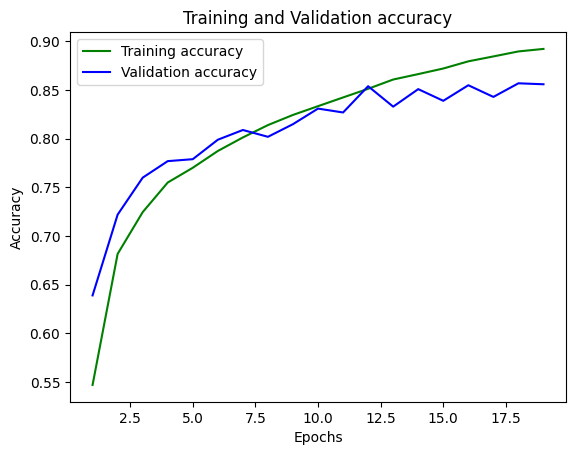

In [ ]:

epochs = range(1,20)
plt.plot(epochs, history_train_accuracy[:19], 'g', label='Training accuracy')
plt.plot(epochs, history_val_accuracy[:19], 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

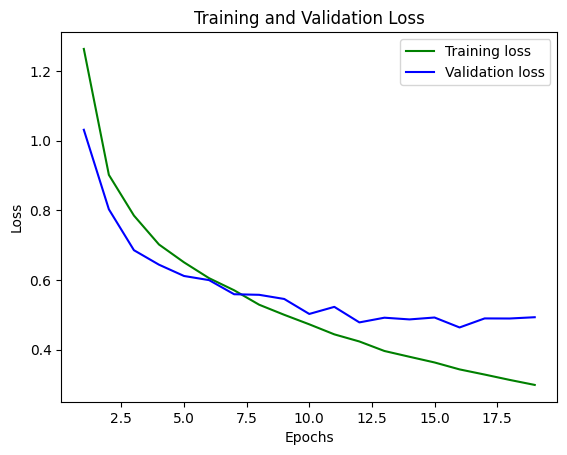

In [ ]:
epochs = range(1,20)
plt.plot(epochs, history_train_loss[:19], 'g', label='Training loss')
plt.plot(epochs, history_val_loss[:19], 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Evaluate TEST

In [ ]:
#Evaluate the model through the Loader Test
model.eval()
with torch.no_grad():
    correct_val = 0
    total_val = 0

    for inputs, labels in loader_test:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)

        _, predicted = outputs.max(1)

        correct_val += predicted.eq(labels).sum().item()
        total_val += labels.size(0)

    val_accuracy = correct_val / total_val
    print("__"*5,"ACCURACY TEST","__"*5)
    print(f'\t Test Accuracy: {val_accuracy:.4f}')
    print("__"*18)

__________ ACCURACY TEST __________
	 Test Accuracy: 0.8266
____________________________________


## Test With Image Outside CIFAR

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import IPython.display as display
import cv2
import matplotlib.pyplot as plt

def Test_Model(url):

  response = requests.get(url)
  img = Image.open(BytesIO(response.content))


  display.display(img)
  img_2 = cv2.cvtColor(np.array(img.convert("RGB")), cv2.COLOR_RGB2BGR)
  resized_image = cv2.resize(img_2, (32, 32))

  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  img_test=transform_test(resized_image)

  outputs = model(img_test.unsqueeze(0).to(device))
  _, predicted = outputs.max(1)
  return classes[predicted]


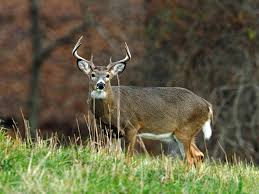

'deer'

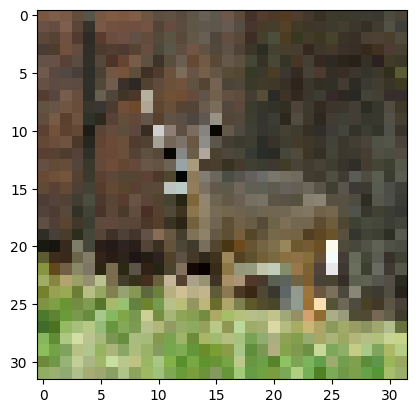

In [ ]:
url="https://e3.365dm.com/21/07/1600x900/skynews-boeing-737-plane_5435020.jpg?20210702173340"
url2='https://www.shutterstock.com/image-photo/brown-hourse-long-mane-meadow-260nw-1809630292.jpg'
url3="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPyB4azGShkM2TsO6Bf3YL9YvCYfQnnA9wLA&usqp=CAU"
url4="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQSqURL7TtxpZ3LFqu9ZDcMtMXpEUacWDxBvQ&usqp=CAU"

Test_Model(url3)

## Save Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}, '/content/drive/MyDrive/saved_model.pth')


Mounted at /content/drive


## Results and Analysis

**RESULT**

| |**Train**| Validation| Test|
|---|---|---|---|
|Acurrancy|89.84|84.50|82.66|
|Loss|0.2858|0.5239|0.541|


The model has not achieved the maximum results, but the performance is quite high and can be used for some applications with less stringent accuracy requirements. This is partly due to the small size of the images (32x32), making it challenging for the model to achieve optimal performance.The model is not experiencing overfitting or underfitting as the accuracy and loss between the training and validation sets do not exhibit significant differences. When tested with different external images, the model performs quite well. However, for some images, inaccuracies occur, particularly those with complex backgrounds such as boats and frogs where an abundance of water in the background leads to mispredictions by the model.

**Observations**:

  - Data augmentation helps the model improve during training
  - The Validation set helps the model detect overfitting of the model
  - For this model, the optimal use of Adam will be better than SGD + momentum
  - After testing self-designed models, it was observed that complexity does not always result in better performance.
  -Not always using a lot of Data Augmentation makes the model perform better.



**Challenges**:
 - Testing self-designed models takes a considerable amount of time.
 - GPU of colab are limited.
 - Not much experience with CNN (Convolutional Neural Networks) yet.
 - Some challenges with the CIFAR-10 dataset include its small size, noise, and background noise


 **Insights Gained**:

- The exercise likely provides insights into the impact of architectural choices on model performance, showcasing the importance of experimentation and fine-tuning.
-Dive deeper into the functionality and roles of layers in Deep Learning.
- Understanding the influence of hyperparameters on training dynamics and the model's ability to generalize.
- Recognition of the interplay between the chosen dataset and the complexity of the model architecture.




**Dataset Choice:**
   - The selection of a well-known dataset (CIFAR-10, ImageNet, or MNIST) is foundational. Depending on the chosen dataset, insights into the model's ability to handle different complexities of image data and diverse classes can be gained.

**PyTorch Implementation:**
   - Leveraging PyTorch for the implementation is a wise choice due to its popularity, extensive community support, and powerful tools for building neural networks. This would likely result in a more efficient and maintainable codebase.

**Model Architecture:**
   - Designing a unique CNN architecture with at least three convolutional layers, activation functions, and pooling layers reflects an attempt to balance model complexity. Experimentation with filter sizes and layer numbers could provide insights into the impact of architecture on the model's capacity to learn and generalize.

**Data Augmentation:**
   - Implementing data augmentation techniques is expected to enhance the model's robustness by exposing it to variations in the training data. This could lead to insights into the importance of data diversity in improving model generalization.

**Loss Function and Optimizer:**
   - Choosing an appropriate loss function (e.g., CrossEntropyLoss) and optimizer (e.g., Adam or SGD) aligns with standard practices. Insights may be gained into how these choices affect the convergence and overall performance of the model.
 **Training Loop:**
   - A well-implemented training loop with monitoring of training loss and accuracy provides insights into the learning dynamics of the model. Observations on how quickly the model converges and whether there are signs of overfitting or underfitting can be gained.

 **Validation:**
   - Evaluating the model on a separate validation dataset is crucial for understanding its generalization capability. Insights into the model's ability to perform well on unseen data and potential areas for improvement can be derived from the validation results.

**Hyperparameter Tuning:**
   - Experimenting with hyperparameters like learning rate, batch size, and the number of filters in the convolutional layers provides insights into their impact on training dynamics and final model performance. Understanding the sensitivity of the model to these hyperparameters is crucial for optimization.

